# Transform hydrographic data from UNIS to CF-NetCDF

In [1]:
from pathlib import Path
import xarray as xr
from check_for_met_ACDD import missing_MET_ACDD_attributes

## Parent .nc file

In [22]:
#!compliance-checker --test=cf:1.7 -c strict /home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_all_1876-2019.nc

In [23]:
#!compliance-checker --test=acdd:1.3 -c strict /home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_all_1876-2019.nc

In [24]:
original_data_dir = Path('data/original_data')

file_path = original_data_dir / 'CTD_all_1876-2019.nc'

xrds = xr.open_dataset(file_path)

print(xrds)

<xarray.Dataset> Size: 13GB
Dimensions:      (PRES: 7225, TIME: 76708, CALIBRATION: 2)
Coordinates:
  * PRES         (PRES) float64 58kB 1.0 2.0 3.0 ... 7.224e+03 7.225e+03
  * TIME         (TIME) datetime64[ns] 614kB 1876-07-10T00:00:01.000004608 .....
    CALIBRATION  (CALIBRATION, TIME) float64 1MB ...
Data variables:
    STATION      (TIME) |S25 2MB ...
    LATITUDE     (TIME) float64 614kB ...
    LONGITUDE    (TIME) float64 614kB ...
    TEMP         (TIME, PRES) float64 4GB ...
    PSAL         (TIME, PRES) float64 4GB ...
    CNDC         (TIME, PRES) float64 4GB ...
    FDEP         (TIME) float64 614kB ...
    SHIP         (TIME) |S52 4MB ...
    SHIPID       (TIME) float32 307kB ...
    OWNER        (TIME) |S31 2MB ...
    CRUISE       (TIME) |S47 4MB ...
    TYPE         (TIME) |S47 4MB ...
Attributes: (12/38)
    cruise_ID:                     
    instrument:                    Shipborne observation
    institution:                   The University Centre in Svalbard, Nor

In [ ]:
# time = xrds['TIME']
# # Initialisng variables to track non-monotonic indices
# non_monotonic_indices = []
# non_monotonic_transitions=0
# same_time = 0

# # Checking for non-monotonic transitions

# for i in range(1, len(time)):
#     print(f"Values checked: {i}/{len(time)}. Non-monotonic transitions found: {non_monotonic_transitions}. Have same time as previous index: {same_time}/{non_monotonic_transitions}", end='\r')
#     if time[i] <= time[i - 1]:
#         non_monotonic_indices.append(i)
#         non_monotonic_transitions += 1
#         if time[i] == time[i - 1]:
#             same_time += 1
# print('')
# # Printing indices where datetime values are not monotonic
# if non_monotonic_indices:
#     print("Indices where datetime values are not monotonic:")
#     for idx in non_monotonic_indices:
#         print(f"Index: {idx}, Value: {time[idx]}")

# else:
#     print("Datetime values are monotonic (either strictly increasing or decreasing).")

NOTE: The parent file has non-monotonic time values. In all cases the is due to repetition of the same time value

Checking what MET ACDD attributes are missing

In [ ]:
missing_MET_ACDD_attributes(file_path)

data/original_data/CTD_all_1876-2019.nc is missing or has empty the following required attributes:
  - date_created: Required (MISSING)
  - creator_type: Required (MISSING)
  - creator_institution: Required (MISSING)
  - creator_name: Required (MISSING)
  - creator_email: Required (MISSING)
  - creator_url: Required (MISSING)
  - publisher_name: Required if not hosted by MET (MISSING)
  - publisher_email: Required if not hosted by MET (MISSING)
  - publisher_url: Required if not hosted by MET (MISSING)
  - history: Required (EMPTY)
  - project: Required (EMPTY)


## All child .nc files

In [9]:
#!compliance-checker --test=acdd:1.3 -c strict /home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_18760710T000000_78.12_13.92.nc

In [ ]:
from check_for_met_ACDD import missing_MET_ACDD_attributes
file_path = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_18760710T000000_78.12_13.92.nc'
# file_path = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_all_1876-2019.nc'
missing_attrs = missing_MET_ACDD_attributes(file_path)
missing_attrs

/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_all_1876-2019.nc is missing or has empty the following required attributes:
  - date_created: Required (MISSING)
  - creator_type: Required (MISSING)
  - creator_institution: Required (MISSING)
  - creator_name: Required (MISSING)
  - creator_email: Required (MISSING)
  - creator_url: Required (MISSING)
  - publisher_name: Required if not hosted by MET (MISSING)
  - publisher_email: Required if not hosted by MET (MISSING)
  - publisher_url: Required if not hosted by MET (MISSING)
  - history: Required (EMPTY)
  - project: Required (EMPTY)


In [8]:
import xarray as xr
xrds = xr.open_dataset(file_path)
# xrds.attrs['date_created'] = '2019-08-16T00:00:00Z'
xrds

<xarray.Dataset> Size: 13GB
Dimensions:      (PRES: 7225, TIME: 76708, CALIBRATION: 2)
Coordinates:
  * PRES         (PRES) float64 58kB 1.0 2.0 3.0 ... 7.224e+03 7.225e+03
  * TIME         (TIME) datetime64[ns] 614kB 1876-07-10T00:00:01.000004608 .....
    CALIBRATION  (CALIBRATION, TIME) float64 1MB ...
Data variables:
    STATION      (TIME) |S25 2MB ...
    LATITUDE     (TIME) float64 614kB ...
    LONGITUDE    (TIME) float64 614kB ...
    TEMP         (TIME, PRES) float64 4GB ...
    PSAL         (TIME, PRES) float64 4GB ...
    CNDC         (TIME, PRES) float64 4GB ...
    FDEP         (TIME) float64 614kB ...
    SHIP         (TIME) |S52 4MB ...
    SHIPID       (TIME) float32 307kB ...
    OWNER        (TIME) |S31 2MB ...
    CRUISE       (TIME) |S47 4MB ...
    TYPE         (TIME) |S47 4MB ...
Attributes: (12/38)
    cruise_ID:                     
    instrument:                    Shipborne observation
    institution:                   The University Centre in Svalbard, Norway
    project:                       
    data_assembly_center:          GOVERNMENT AGENCIES-NON-US>NORWAY>>>NO/UNIS
    naming_authority:              The University Centre in Svalbard, Norway
    ...                            ...
    keywords:                      EARTH SCIENCE>OCEANS>OCEAN TEMPERATURE>WAT...
    iso_topic_category:            oceans
    license:                       CC-BY 4.0 https://creativecommons.org/lice...
    history:                       
    comment:                       
    references:                    Backhaus, Jan (2018): Physical oceanograph...

In [ ]:
file_path = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_18760710T000000_78.12_13.92.nc'

xrds = xr.open_dataset(file_path)
xrds

for attribute, value in xrds.attrs.items():
    print(attribute, value, '\n')

cruise_ID Gronfjord_1876_7 

instrument_type C 

instrument Shipborne observation 

institution The University Centre in Svalbard, Norway 

project  

data_assembly_center GOVERNMENT AGENCIES-NON-US>NORWAY>>>NO/UNIS 

naming_authority The University Centre in Svalbard, Norway 

Conventions CF-1.7, ACDD-1.3 

standard_name_vocabulary CF Standard Name Table v61 

cdm_data_type Station 

Processing_level post-recovery calibrations have been applied 

QC_indicator Good 

geospatial_lat_min 78.12 

geospatial_lat_max 78.12 

geospatial_lat_units degree_north 

geospatial_lon_min 13.92 

geospatial_lon_max 13.92 

geospatial_lon_units degree_east 

geospatial_vertical_min 1.0 

geospatial_vertical_max 240.0 

geospatial_vertical_positive down 

geospatial_vertical_units dbar 

time_coverage_start 1876-07-10T00:00:00Z 

time_coverage_end 1876-07-10T00:00:00Z 

title UNIS hydrographic database 

summary This data set is named the UNIS Hydrographic Database (UNIS HD). UNIS HD is a collection of

In [ ]:
# List subdirectories
subdirs = [d for d in original_data_dir.iterdir() if d.is_dir()]

# Print the subdirectories
print(subdirs)

[PosixPath('data/original_data/CTD_2000-2009'), PosixPath('data/original_data/CTD_2010-2019'), PosixPath('data/original_data/CTD_1970-1979'), PosixPath('data/original_data/CTD_1990-1999'), PosixPath('data/original_data/CTD_1876-1969'), PosixPath('data/original_data/CTD_1980-1989')]


## Loop through all children to fill 'history' and 'comment'?
also add CF-1.8 to 'Conventions'?

Checking if all child files have the same errors when run through the checker.
Should all be similar to:

--------------------------------------------------------------------------------
                               Corrective Actions                               
UNIS_HD_20020809T034357_76.929_18.659167.nc has 1 potential issue


                                    Warnings                                    
--------------------------------------------------------------------------------
§2.6 Attributes
* §2.6.2 global attribute history should exist and be a non-empty string
* §2.6.2 comment global attribute should be a non-empty string
* §2.6.1 Conventions global attribute does not contain "CF-1.8"

In [ ]:
# import os
# import subprocess

# unexpected_error_files = []

# # Loop through each subdirectory
# for subdir in subdirs:
#     print(f"Subdirectory: {subdir.name}")
    
#     # List .nc files in the current subdirectory
#     nc_files = list(subdir.glob('*.nc'))
    
#     # Loop through each .nc file
#     for nc_file in nc_files:
#         # print(f"  .nc file: {nc_file.name}")
#         # print(str(nc_file.name).split('_'))
#         command = f"compliance-checker --test=cf:1.8 {nc_file}"
#         result = subprocess.run(command, shell=True, capture_output=True, text=True)
#         print(f'Files with unexpected errors: {len(unexpected_error_files)}', end='\r')

#         # Checking if the output contains the expected warning message
#         if ".nc has 1 potential issue" in result.stdout:
#             continue
#             #print(f'File: {nc_file.name} has expected attribute errors', end='\r')
#         elif '''§2.6 Attributes
#             * §2.6.2 global attribute history should exist and be a non-empty string
#             * §2.6.2 comment global attribute should be a non-empty string
#             * §2.6.1 Conventions global attribute does not contain "CF-1.8"''' in result.stdout:
#             continue
#         else:
#             unexpected_error_files.append(nc_file.name)
#             # print(f"File: {nc_file.name} has other errors")


    

In [ ]:
# import os
# import subprocess

# unexpected_error_files = []

# # Loop through each subdirectory
# for subdir in subdirs:
#     print(f"Subdirectory: {subdir.name}")
    
#     # List .nc files in the current subdirectory
#     nc_files = list(subdir.glob('*.nc'))

#     expected_output = '''has 1 potential issue


#                                     Warnings                                    
# --------------------------------------------------------------------------------
# §2.6 Attributes
# * §2.6.2 global attribute history should exist and be a non-empty string
# * §2.6.2 comment global attribute should be a non-empty string
# * §2.6.1 Conventions global attribute does not contain "CF-1.8"
# '''
    
#     # Loop through each .nc file
#     for nc_file in nc_files:
#         # print(f"  .nc file: {nc_file.name}")
#         # print(str(nc_file.name).split('_'))
#         command = f"compliance-checker --test=cf:1.8 {nc_file}"
#         result = subprocess.run(command, shell=True, capture_output=True, text=True)
#         print(f'Files with unexpected errors: {len(unexpected_error_files)}', end='\r')

#         # Check if the output matches the expected output
#         if result.stdout.strip().split('.nc')[1] != expected_output.strip():
#             print(result.stdout.strip().split('.nc')[1])
#             print('BREAK')
#             print(expected_output.strip())
#             exit()

#             unexpected_error_files.append(nc_file.name)
#             # Print the command output for files with unexpected errors
#             print(f"\nFile: {nc_file.name} has unexpected output:")
#             print(result.stdout)

Subdirectory: CTD_2000-2009
 has 1 potential issueerrors: 0


                                    Warnings                                    
--------------------------------------------------------------------------------
§2.6 Attributes
* §2.6.2 global attribute history should exist and be a non-empty string
* §2.6.2 comment global attribute should be a non-empty string
* §2.6.1 Conventions global attribute does not contain "CF-1.8"
BREAK
has 1 potential issue


                                    Warnings                                    
--------------------------------------------------------------------------------
§2.6 Attributes
* §2.6.2 global attribute history should exist and be a non-empty string
* §2.6.2 comment global attribute should be a non-empty string
* §2.6.1 Conventions global attribute does not contain "CF-1.8"

File: UNIS_HD_20080803T105613_79.03875_11.32125.nc has unexpected output:


---------------------------------------------------------------------------

KeyboardInterrupt: 

: 

## Checking time resolution in child files

In [10]:
import xarray as xr     

In [21]:
file_1 = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_19010708T000000_75.03_33.5.nc'
file_2 = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_19010708T000000_75.25_33.5.nc'
file_3 = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/original_data/CTD_1876-1969/UNIS_HD_19010708T000000_75.42_33.5.nc'

xrds_1 = xr.open_dataset(file_1)
xrds_2 = xr.open_dataset(file_2)

xrds_1['TIME'] == xrds_2['TIME']


<xarray.DataArray 'TIME' (TIME: 1)> Size: 1B
array([ True])
Coordinates:
  * TIME     (TIME) datetime64[ns] 8B 1901-07-08T00:00:01.000004608

## Having a quick look at some profiles

In [2]:
!compliance-checker --test=cf:1.7 -c strict /home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/transformed_data/CTD_2010-2019/UNIS_HD_20141007T152600_75.434_12.698.nc

Running Compliance Checker on the datasets from: ['/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/transformed_data/CTD_2010-2019/UNIS_HD_20141007T152600_75.434_12.698.nc']
Using cached standard name table v61 from /home/alessioc/.local/share/compliance-checker/cf-standard-name-table-test-61.xml


--------------------------------------------------------------------------------
                         IOOS Compliance Checker Report                         
                                 Version 5.1.1                                  
                     Report generated 2024-06-26T09:37:26Z                      
                                     cf:1.7                                     
http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html
--------------------------------------------------------------------------------
All tests passed!


In [52]:
import xarray as xr
import matplotlib.pyplot as plt

file = '/home/alessioc/UNIS_hydrographic_data_to_cfnetcdf/data/transformed_data/CTD_1876-1969/UNIS_HD_19010823T000000_79.07_28.42.nc'

xrds = xr.open_dataset(file)

xrds

<xarray.Dataset> Size: 2kB
Dimensions:      (PRES: 76, TIME: 1, CALIBRATION: 2)
Coordinates:
  * PRES         (PRES) float64 608B 1.0 2.0 3.0 4.0 5.0 ... 73.0 74.0 75.0 76.0
  * TIME         (TIME) datetime64[ns] 8B 1901-08-23T00:00:01.000004608
    CALIBRATION  (CALIBRATION, TIME) float64 16B ...
Data variables:
    LATITUDE     (TIME) float64 8B ...
    LONGITUDE    (TIME) float64 8B ...
    TEMP         (TIME, PRES) float64 608B ...
    PSAL         (TIME, PRES) float64 608B ...
    CNDC         (TIME, PRES) float64 608B ...
Attributes: (12/45)
    cruise_ID:                     OWOD13_99
    instrument_type:               B
    instrument:                    Shipborne observation
    institution:                   The University Centre in Svalbard, Norway
    project:                       A collection of projects have contributed ...
    data_assembly_center:          GOVERNMENT AGENCIES-NON-US>NORWAY>>>NO/UNIS
    ...                            ...
    creator_type:                  person
    creator_institution:           University Centre in Svalbard; Norwegian P...
    creator_name:                  Ragnheid Skogseth; Mathias Bockwoldt
    creator_email:                 Ragnheid.Skogseth@unis.no; mathias.bockwol...
    creator_url:                   https://orcid.org/0000-0003-0210-4981; htt...
    featureType:                   profile

In [57]:
xrds['TEMP'].values

array([[ 0.3 ,   nan,   nan,   nan,  0.07,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,  0.1 ,   nan,   nan,   nan,
          nan, -0.5 ,   nan,   nan,   nan,   nan, -0.49,   nan,   nan,
          nan,   nan, -0.48,   nan,   nan,   nan,   nan, -0.47,   nan,
          nan,   nan,   nan, -0.46,   nan,   nan,   nan,   nan,   nan,
        -0.45,   nan,   nan,   nan,   nan, -0.45,   nan,   nan,   nan,
          nan, -0.44,   nan,   nan,   nan,   nan, -0.43,   nan,   nan,
          nan,   nan, -0.42,   nan,   nan,   nan,   nan, -0.41,   nan,
          nan,   nan,   nan, -0.4 ]])

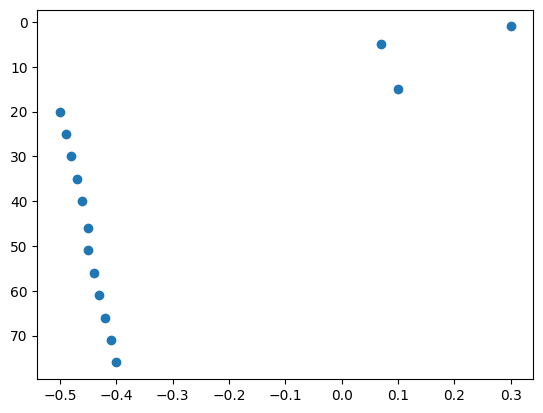

In [62]:
plt.scatter(xrds['TEMP'].values[0], xrds['PRES'].values)
plt.gca().invert_yaxis()